# Prevendo Custos Médicos com Regressão Linear

Este notebook apresenta a criação de um modelo preditivo de **regressão linear** para prever os custos médicos individuais com base em características como **idade**, **índice de massa corporal (IMC)**, **número de filhos**, **região residencial**, e se a pessoa é **fumante** ou **não-fumante**.

Utilizaremos um pipeline para pré-processar os dados e criar o modelo de forma eficiente. Além disso, faremos uma comparação entre o modelo de regressão e um **modelo trivial**, que prevê a média dos valores. Ao final, avaliaremos a performance do modelo utilizando métricas como **MSE**, **MAE** e **R²**.







In [79]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# Carregar e explorar os dados
df = pd.read_csv("insurance.csv")

print("Primeiras linhas do dataset:")
print(df.head())

print("\nInformações sobre o dataset:")
print(df.info())

In [ ]:
# Verificar se há valores nulos
print("\nValores nulos no dataset:")
print(df.isnull().sum())

In [59]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['charges'])  # Variáveis explicativas
y = df['charges']  # Variável alvo (custo médico)

In [60]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Pré-processamento e criação do pipeline
# Categorias a serem codificadas e variáveis numéricas a serem escalonadas
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Criar o transformador que processará essas variáveis
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Padronizar variáveis numéricas
        ('cat', OneHotEncoder(), categorical_features)  # Codificar variáveis categóricas como dummies
    ])


In [87]:
# Modelo de Regressão Linear
# Criar o pipeline que executa o pré-processamento e a regressão linear
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar o pipeline
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

## Avaliação do Modelo com Métricas

Para medir a eficácia do nosso modelo de **regressão linear**, utilizamos três métricas principais. Cada uma delas oferece uma perspectiva diferente sobre o desempenho do modelo ao prever os custos médicos:

- **Mean Squared Error (MSE)**: Esta métrica calcula a média dos quadrados dos erros (a diferença entre os valores reais e os previstos). Ela penaliza mais os erros grandes, já que eleva os erros ao quadrado. Quanto menor o MSE, melhor o modelo está ajustado. Um MSE muito alto indica que as previsões do modelo estão longe dos valores reais.

- **Mean Absolute Error (MAE)**: O MAE mede a média dos erros absolutos, ou seja, a diferença absoluta entre os valores reais e os previstos. Ele é mais intuitivo do que o MSE, pois não eleva os erros ao quadrado. Um MAE baixo indica que o modelo faz previsões com precisão, com erros médios pequenos. Assim como o MSE, quanto menor o MAE, melhor.

- **Coeficiente de Determinação (R²)**: O R² indica a proporção da variabilidade nos dados que o modelo consegue explicar. Um valor de R² próximo de **1** indica que o modelo está capturando bem as relações entre as variáveis. Um R² baixo, por outro lado, sugere que o modelo não está ajustado adequadamente e que há espaço para melhorias.

Essas métricas nos fornecem uma visão ampla sobre o quão bem o modelo está prevendo os custos médicos. A análise dessas três métricas em conjunto nos permite identificar se o modelo está errando por muito, se está capturando corretamente a variação nos dados e se os erros são aceitáveis ou grandes demais.

In [92]:
# Métricas de Avaliação do modelo com Regressão Linear
mse_modelo = mean_squared_error(y_test, y_pred)
mae_modelo = mean_absolute_error(y_test, y_pred)
r2_modelo  = r2_score(y_test, y_pred)

# Métricas de Avaliação do modelo trivial (média). *sempre prevê a média dos valores de treino
mean_pred = np.full_like(y_test, y_train.mean())
mse_trivial = mean_squared_error(y_test, mean_pred)
mae_trivial = mean_absolute_error(y_test, mean_pred)
r2_trivial = r2_score(y_test, mean_pred)

print(f"MSE (modelo): {mse_modelo}")
print(f"MAE (modelo): {mae_modelo}")
print(f"R²  (modelo): {r2_modelo}\n")
print(f"MSE (média): {mse_trivial}")
print(f"MAE (média): {mae_trivial}")
print(f"R²  (média): {r2_trivial}")

MSE (modelo): 33596915.851361476
MAE (modelo): 4181.194473753652
R²  (modelo): 0.7835929767120722

MSE (média): 155391443.68461317
MAE (média): 9593.33846086229
R²  (média): -0.0009192486886582252


In [89]:
# 10. Exibição dos 5 primeiros exemplos: Valores Reais vs Predições do Modelo e do Modelo Trivial
df_comparacao = pd.DataFrame({
    'Valor Real': y_test.head(5),
    'Predição Modelo': y_pred[:5],
    'Predição Trivial (Média)': mean_pred[:5]
})

print("\nComparação dos 5 primeiros valores reais, predições do modelo e predições triviais:\n")
print(df_comparacao)


Comparação dos 5 primeiros valores reais, predições do modelo e predições triviais:

       Valor Real  Predição Modelo  Predição Trivial (Média)
764    9095.06825      8969.550274              13346.089736
887    5272.17580      7068.747443              13346.089736
890   29330.98315     36858.410912              13346.089736
1293   9301.89355      9454.678501              13346.089736
259   33750.29180     26973.173457              13346.089736


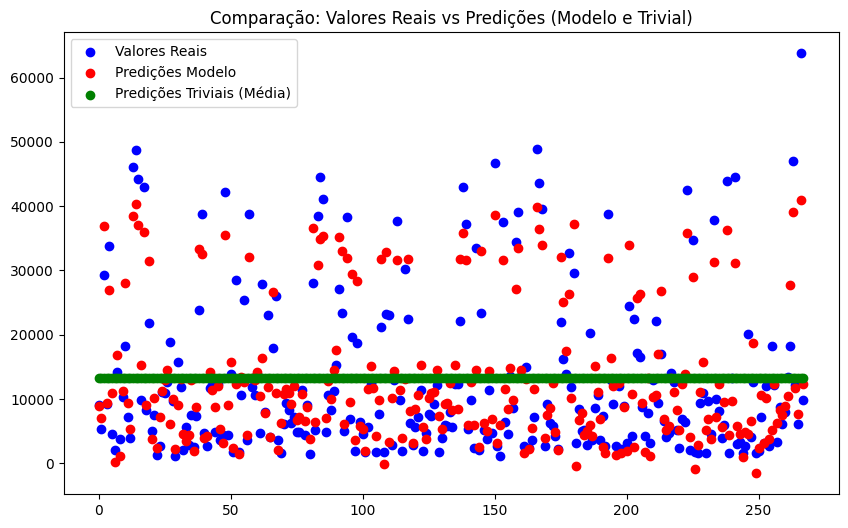

In [91]:
# 11. Plotar os valores reais vs predições
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label="Valores Reais", color="blue")
plt.scatter(range(len(y_pred)), y_pred, label="Predições Modelo", color="red")
plt.scatter(range(len(mean_pred)), mean_pred, label="Predições Triviais (Média)", color="green")
plt.title("Comparação: Valores Reais vs Predições (Modelo e Trivial)")
plt.legend()
plt.show()

## Conclusão

Neste notebook, criamos um modelo de **regressão linear** para prever os custos médicos individuais, usando variáveis como idade, IMC, número de filhos, região e se a pessoa é fumante. Para organizar o processo de pré-processamento e treinamento de forma eficiente, utilizamos **pipelines**.

### Análise das Métricas:
Ao comparar o desempenho do modelo de regressão linear com um modelo simples que sempre prevê a média dos custos médicos, conseguimos observar uma grande diferença nos resultados:

- O **MSE** do modelo de regressão (**33.596.915**) foi bem menor do que o do modelo trivial (**155.391.443**), o que indica que o nosso modelo cometeu erros muito menores nas previsões.
- O **MAE** também seguiu essa tendência: o modelo de regressão teve um erro médio de **4.181**, enquanto o modelo trivial teve um erro médio de **9.593**, mostrando que a regressão foi bem mais precisa.
- Já o **R²** do modelo de regressão (**0,78**) revelou que ele conseguiu explicar cerca de 78% da variação nos custos médicos, enquanto o modelo trivial, com um **R² negativo**, praticamente não conseguiu capturar nenhuma variação relevante dos dados.

### Próximos passos:
Para melhorar o desempenho, poderíamos explorar outros modelos mais avançados, como **árvores de decisão** ou **regressões regularizadas** (Ridge ou Lasso), além de analisar outras variáveis que possam influenciar os custos médicos. Também seria interessante investigar a presença de outliers que possam estar afetando o desempenho.

Em resumo, o modelo de **regressão linear** se mostrou bem mais eficiente do que o modelo trivial, conseguindo capturar padrões importantes e fornecendo previsões bem mais precisas, como vimos pelas métricas de desempenho.